In [2]:
import logging
logger = logging.getLogger()
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)
formatter = logging.Formatter("=[%(levelname)s @ %(filename)s (L=%(lineno)s) F=%(funcName)s() ]= %(message)s")
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)   

In [3]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from generator import ExperimentConfiguration
from generator import GeneratorConstants

In [4]:
EXPERIMENT_DIR = "../simulation/"
EXPERIMENT_FILENAME = "_config.json"
EXPERIMENT_CONFIGS = [    "3.3.3.3.3.3",
        "3.3.3.3.6",
        "3.3.3.4.4",
        "3.3.4.3.4",
        "3.4.6.4",
        "3.6.3.6",
        "3.12.12",
        "4.4.4.4",
        "4.6.12",
        "4.8.8",
        "6.6.6",
        "4.6.12.a",
        "4.6.12.b"]
RESULT_FOLDER = "../results/"

In [5]:
import json
def extract_config(json_string):
    tmp_obj = json.loads(json_string)
    ex_ID = tmp_obj["experiment_id"]
    clothing_id = tmp_obj["clothing_id"]
    size = tmp_obj["size"]
    sex=tmp_obj["sex"]
    algo = tmp_obj["tesselation_algorithm"]
    node_distance =  tmp_obj["node_distance"]
    joint_radius = tmp_obj["joint_radius"]
    return {"ID": ex_ID, "clothing_id": clothing_id, "size": size, "sex":sex, "algorythm":algo, "node_distance": node_distance, "joint_radius": joint_radius}



In [6]:
import pandas as pd

df = pd.read_csv(RESULT_FOLDER+"integrated_results.csv", sep=',', encoding='utf-8')

print(df.shape[0])

44200


In [7]:
data_top = df.head()

data_top

,Unnamed: 0,CFG_ID,CFG_clothe_ID,CFG_sex,CFG_size,CFG_algorythm,CFG_node_distance,CFG_joint_radius,T_wire_L,T_jumper_L,...,LJP_graph_jumper_C__Median,LJP_graph_jumper_C__lci,LJP_graph_jumper_C__hci,LJP_graph_jumper_C__Mean,LJP_graph_jumper_C__p05,LJP_graph_jumper_C__p10,LJP_graph_jumper_C__p25,LJP_graph_jumper_C__p75,LJP_graph_jumper_C__p90,LJP_graph_jumper_C__p95
0,0,1,0,M,XXS,3.3.3.3.3.3,20.0,10.0,79654.710880,2311.057278,...,0.537913,0.514904,0.545624,0.651884,0.449130,0.457659,0.481238,0.906574,1.073716,1.138150
1,1,2,0,M,XXS,3.3.3.3.3.3,20.0,20.0,79498.099375,8529.207535,...,0.519468,0.493262,0.538123,0.670028,0.442389,0.447890,0.470851,0.922537,1.176943,1.289697
2,2,3,0,M,XXS,3.3.3.3.3.3,20.0,40.0,79535.240351,30972.190337,...,0.486306,0.470102,0.503981,0.592177,0.394442,0.405066,0.445159,0.604865,1.001360,1.077804
3,3,4,0,M,XXS,3.3.3.3.3.3,20.0,80.0,79565.398181,101600.834352,...,0.484091,0.462667,0.520164,0.589145,0.402153,0.413595,0.437841,0.617315,1.006545,1.117991
4,4,5,0,M,XXS,3.3.3.3.3.3,20.0,160.0,79605.510938,259110.713995,...,0.515481,0.499032,0.570260,0.621210,0.418746,0.430274,0.454416,0.650084,1.052006,1.137835


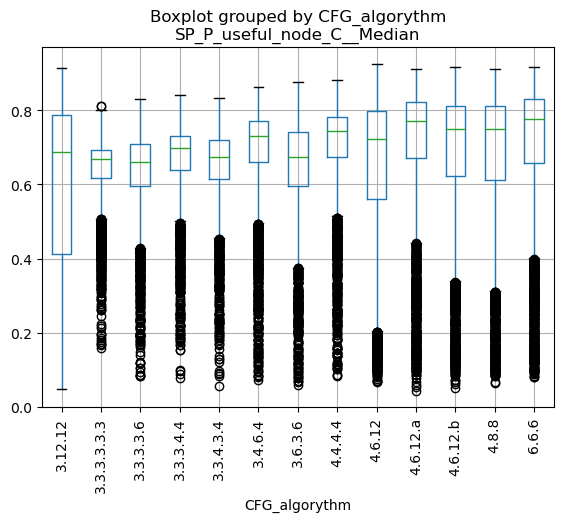

In [8]:
box = df.boxplot(column='SP_P_useful_node_C__Median', by='CFG_algorythm', rot=90)

* T = total
* P = percent
* C = count
* L = length
* lci = low confidence interval 95%
* hci = high confidence interval 95%
* p05 - p95 = percentiles of data
* SP - shortest path algorythm
* LJP - least jumper path algorythm

In [9]:
#df.boxplot(column='SP_P_reachable_sensors', by='CFG_algorythm', rot=90)
#gdf = df.groupby(['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius']).agg()

#gdfm = gdf.agg({'A': 'sum', 'B': 'sum', 'C': 'sum', 'Total': 'count'})mean()

key_df = df[['CFG_clothe_ID', 'CFG_size', 'CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius', 'T_wire_L', 'T_jumper_L', 'T_jumper_C', 'T_node_C', 
             'reachable_node_C__Median', 'reachable_node_C__lci', 'reachable_node_C__hci',
             'reachable_wire_L__Median','reachable_wire_L__lci','reachable_wire_L__hci',
             'reachable_jumper_L__Median', 'reachable_jumper_L__lci', 'reachable_jumper_L__hci',
             'reachable_jumper_C__Median', 'reachable_jumper_C__lci', 'reachable_jumper_C__hci',
             'SP_P_useful_node_C__Median', 'SP_P_useful_node_C__lci', 'SP_P_useful_node_C__hci',
             'SP_P_useful_wire_L',
             'SP_P_reachable_sensors',
             'SP_P_useful_jumper_C__Median','SP_P_useful_jumper_C__lci', 'SP_P_useful_jumper_C__hci',
             'SP_P_useful_jumper_L__Median', 'SP_P_useful_jumper_L__lci', 'SP_P_useful_jumper_L__hci',
             'SP_P_unreachable_bc_short_jumper',
             'SP_P_multiroute_reached_nodes__Median', 'SP_P_multiroute_reached_nodes__lci', 'SP_P_multiroute_reached_nodes__hci',
             'SP_path_L__Max', 'SP_path_L__Max_lci', 'SP_path_L__Max_hci', 'SP_path_L__Median', 'SP_path_L__Mean', 'SP_path_L__lci', 'SP_path_L__hci',
             'SP_path_node_C__Max', 'SP_path_node_C__Max_lci', 'SP_path_node_C__Max_hci', 'SP_path_node_C__Median', 'SP_path_node_C__Mean',  'SP_path_node_C__lci', 'SP_path_node_C__hci',
             'SP_path_jumper_C__Max', 'SP_path_jumper_C__Max_lci', 'SP_path_jumper_C__Max_hci', 'SP_path_jumper_C__Median', 'SP_path_jumper_C__lci', 'SP_path_jumper_C__hci',
             'SP_path_sensor_jumper_L__Max', 'SP_path_sensor_jumper_L__Max_lci', 'SP_path_sensor_jumper_L__Max_hci', 'SP_path_sensor_jumper_L__Median', 'SP_path_sensor_jumper_L__lci', 'SP_path_sensor_jumper_L__hci',
             'SP_path_router_node_branches__Max', 'SP_path_router_node_branches__Max_lci', 'SP_path_router_node_branches__Max_hci', 'SP_path_router_node_branches__Median', 'SP_path_router_node_branches__lci', 'SP_path_router_node_branches__hci',
             'SP_graph_wire_L__Max', 'SP_graph_wire_L__Max_lci', 'SP_graph_wire_L__Max_hci', 'SP_graph_wire_L__Median', 'SP_graph_wire_L__lci', 'SP_graph_wire_L__hci',
             'SP_graph_node_C__Max', 'SP_graph_node_C__Max_lci', 'SP_graph_node_C__Max_hci', 'SP_graph_node_C__Median', 'SP_graph_node_C__lci', 'SP_graph_node_C__hci',
             'SP_graph_jumper_C__Max', 'SP_graph_jumper_C__Max_lci', 'SP_graph_jumper_C__Max_hci', 'SP_graph_jumper_C__Median', 'SP_graph_jumper_C__lci', 'SP_graph_jumper_C__hci',
             
             'LJP_P_useful_node_C__Median', 'LJP_P_useful_node_C__lci', 'LJP_P_useful_node_C__hci',
             'LJP_P_useful_wire_L',
             'LJP_P_reachable_sensors',
             'LJP_P_useful_jumper_C__Median','LJP_P_useful_jumper_C__lci', 'LJP_P_useful_jumper_C__hci',
             'LJP_P_useful_jumper_L__Median', 'LJP_P_useful_jumper_L__lci', 'LJP_P_useful_jumper_L__hci',
             'LJP_P_unreachable_bc_short_jumper',
             'LJP_P_multiroute_reached_nodes__Median', 'LJP_P_multiroute_reached_nodes__lci', 'LJP_P_multiroute_reached_nodes__hci',
             'LJP_path_L__Max', 'LJP_path_L__Max_lci', 'LJP_path_L__Max_hci', 'LJP_path_L__Median', 'LJP_path_L__lci', 'LJP_path_L__hci',
             'LJP_path_node_C__Max', 'LJP_path_node_C__Max_lci', 'LJP_path_node_C__Max_hci', 'LJP_path_node_C__Median', 'LJP_path_node_C__lci', 'LJP_path_node_C__hci',
             'LJP_path_jumper_C__Max', 'LJP_path_jumper_C__Max_lci', 'LJP_path_jumper_C__Max_hci', 'LJP_path_jumper_C__Median', 'LJP_path_jumper_C__lci', 'LJP_path_jumper_C__hci',
             'LJP_path_sensor_jumper_L__Max', 'LJP_path_sensor_jumper_L__Max_lci', 'LJP_path_sensor_jumper_L__Max_hci', 'LJP_path_sensor_jumper_L__Median', 'LJP_path_sensor_jumper_L__lci', 'LJP_path_sensor_jumper_L__hci',
             'LJP_path_router_node_branches__Max', 'LJP_path_router_node_branches__Max_lci', 'LJP_path_router_node_branches__Max_hci', 'LJP_path_router_node_branches__Median', 'LJP_path_router_node_branches__lci', 'LJP_path_router_node_branches__hci',
             'LJP_graph_wire_L__Max', 'LJP_graph_wire_L__Max_lci', 'LJP_graph_wire_L__Max_hci', 'LJP_graph_wire_L__Median', 'LJP_graph_wire_L__lci', 'LJP_graph_wire_L__hci',
             'LJP_graph_node_C__Max', 'LJP_graph_node_C__Max_lci', 'LJP_graph_node_C__Max_hci', 'LJP_graph_node_C__Median', 'LJP_graph_node_C__lci', 'LJP_graph_node_C__hci',
             'LJP_graph_jumper_C__Max', 'LJP_graph_jumper_C__Max_lci', 'LJP_graph_jumper_C__Max_hci', 'LJP_graph_jumper_C__Median', 'LJP_graph_jumper_C__lci', 'LJP_graph_jumper_C__hci',
             ]].copy()


In [10]:
rel_df = key_df.copy()
rel_df['CFG_joint_length_ratio'] = rel_df['CFG_joint_radius'] / rel_df['CFG_node_distance']
rel_df['P_reachable_node_C__Median'] = rel_df['reachable_node_C__Median']/rel_df['T_node_C']
rel_df['P_reachable_node_C__error'] = (rel_df['reachable_node_C__hci']-rel_df['reachable_node_C__lci'])/rel_df['T_node_C']
rel_df['P_reachable_wire_L__Median'] = rel_df['reachable_wire_L__Median']/rel_df['T_wire_L']
rel_df['P_reachable_wire_L__error'] = (rel_df['reachable_wire_L__hci']-rel_df['reachable_wire_L__lci'])/rel_df['T_wire_L']
rel_df['P_reachable_jumper_L__Median'] = rel_df['reachable_jumper_L__Median']/rel_df['T_jumper_L']
rel_df['P_reachable_jumper_L__error'] = (rel_df['reachable_jumper_L__hci']-rel_df['reachable_jumper_L__lci'])/rel_df['T_jumper_L']
rel_df['P_reachable_jumper_C__Median'] = rel_df['reachable_jumper_C__Median']/rel_df['T_jumper_C']
rel_df['P_reachable_jumper_C__error'] = (rel_df['reachable_jumper_C__hci']-rel_df['reachable_jumper_C__lci'])/rel_df['T_jumper_C']
#             'SP_P_useful_node_C__Median'
rel_df['SP_P_useful_node_C__error'] = (rel_df['SP_P_useful_node_C__hci']-rel_df['SP_P_useful_node_C__lci'])
#             'SP_P_useful_wire_L', # FIX counted this 100 times!!!
rel_df['SP_P_useful_wire_L'] = rel_df['SP_P_useful_wire_L'] / 100
#             'SP_P_reachable_sensors',
rel_df['SP_reachability_length_ratio'] = 1000000*rel_df['SP_P_reachable_sensors'] / rel_df['T_wire_L']

#             'SP_P_useful_jumper_C__Median'
rel_df['SP_P_useful_jumper_C__error'] = (rel_df['SP_P_useful_jumper_C__hci']-rel_df['SP_P_useful_jumper_C__lci'])
#             'SP_P_useful_jumper_L__Median', 
rel_df['SP_P_useful_jumper_L__error'] = (rel_df['SP_P_useful_jumper_L__hci']-rel_df['SP_P_useful_jumper_L__lci'])
#             'SP_P_unreachable_bc_short_jumper',
#             'SP_P_multiroute_reached_nodes__Median', 
rel_df['SP_P_multiroute_reached_nodes__error'] = (rel_df['SP_P_multiroute_reached_nodes__hci']-rel_df['SP_P_multiroute_reached_nodes__lci'])
#              
rel_df['SP_P_path_L__Max'] = rel_df['SP_path_L__Max']/rel_df['T_wire_L']
rel_df['SP_P_path_L__Max_error'] = (rel_df['SP_path_L__Max_hci']-rel_df['SP_path_L__Max_lci'])/rel_df['T_wire_L']
rel_df['SP_P_path_L__Median'] = rel_df['SP_path_L__Median']/rel_df['T_wire_L']
rel_df['SP_P_path_L__error'] = (rel_df['SP_path_L__hci']-rel_df['SP_path_L__lci'])/rel_df['T_wire_L']
#             
rel_df['SP_P_path_node_C__Max'] = rel_df['SP_path_node_C__Max']/rel_df['T_node_C']
rel_df['SP_P_path_node_C__Max_error'] = (rel_df['SP_path_node_C__Max_hci']-rel_df['SP_path_node_C__Max_lci'])/rel_df['T_node_C']
rel_df['SP_P_path_node_C__Median'] = rel_df['SP_path_node_C__Median']/rel_df['T_node_C']
rel_df['SP_P_path_node_C__error'] = (rel_df['SP_path_node_C__hci']-rel_df['SP_path_node_C__lci'])/rel_df['T_node_C']
#             
rel_df['SP_P_path_jumper_C__Max'] = rel_df['SP_path_jumper_C__Max']/rel_df['T_jumper_C']
rel_df['SP_P_path_jumper_C__Max_error'] = (rel_df['SP_path_jumper_C__Max_hci']-rel_df['SP_path_jumper_C__Max_lci'])/rel_df['T_jumper_C']
rel_df['SP_P_path_jumper_C__Median'] = rel_df['SP_path_jumper_C__Median']/rel_df['T_jumper_C']
rel_df['SP_P_path_jumper_C__error'] = (rel_df['SP_path_jumper_C__hci']-rel_df['SP_path_jumper_C__lci'])/rel_df['T_jumper_C']
#             
rel_df['SP_P_path_sensor_jumper_L__Max'] = rel_df['SP_path_sensor_jumper_L__Max']/rel_df['T_jumper_L']
rel_df['SP_P_path_sensor_jumper_L__Max_error'] = (rel_df['SP_path_sensor_jumper_L__Max_hci']-rel_df['SP_path_sensor_jumper_L__Max_lci'])/rel_df['T_jumper_L']
rel_df['SP_P_path_sensor_jumper_L__Median'] = rel_df['SP_path_sensor_jumper_L__Median']/rel_df['T_jumper_L']
rel_df['SP_P_path_sensor_jumper_L__error'] = (rel_df['SP_path_sensor_jumper_L__hci']-rel_df['SP_path_sensor_jumper_L__lci'])/rel_df['T_jumper_L']
#             'SP_path_router_node_branches__Max', 'SP_path_router_node_branches__Median', 
rel_df['SP_path_router_node_branches__Max_error'] = (rel_df['SP_path_router_node_branches__Max_hci']-rel_df['SP_path_router_node_branches__Max_lci'])
rel_df['SP_path_router_node_branches__error'] = (rel_df['SP_path_router_node_branches__hci']-rel_df['SP_path_router_node_branches__lci'])
#             'SP_graph_wire_L__Max', 'SP_graph_wire_L__Median', 
rel_df['SP_graph_wire_L__Max_error'] = (rel_df['SP_graph_wire_L__Max_hci']-rel_df['SP_graph_wire_L__Max_lci'])
rel_df['SP_graph_wire_L__error'] = (rel_df['SP_graph_wire_L__hci']-rel_df['SP_graph_wire_L__lci'])
#             'SP_graph_node_C__Max', 'SP_graph_node_C__Median', 
rel_df['SP_graph_node_C__Max_error'] = (rel_df['SP_graph_node_C__Max_hci']-rel_df['SP_graph_node_C__Max_lci'])
rel_df['SP_graph_node_C__error'] = (rel_df['SP_graph_node_C__hci']-rel_df['SP_graph_node_C__lci'])
#             'SP_graph_jumper_C__Max', 'SP_graph_jumper_C__Median', 
rel_df['SP_graph_jumper_C__Max_error'] = (rel_df['SP_graph_jumper_C__Max_hci']-rel_df['SP_graph_jumper_C__Max_lci'])
rel_df['SP_graph_jumper_C__error'] = (rel_df['SP_graph_jumper_C__hci']-rel_df['SP_graph_jumper_C__lci'])


#             'LJP_P_useful_node_C__Median'
rel_df['LJP_P_useful_node_C__error'] = (rel_df['LJP_P_useful_node_C__hci']-rel_df['LJP_P_useful_node_C__lci'])
#             'LJP_P_useful_wire_L',
rel_df['LJP_P_useful_wire_L'] = rel_df['LJP_P_useful_wire_L'] / 100
#             'LJP_P_reachable_sensors',
#             'LJP_P_useful_jumper_C__Median'
rel_df['LJP_P_useful_jumper_C__error'] = (rel_df['LJP_P_useful_jumper_C__hci']-rel_df['LJP_P_useful_jumper_C__lci'])
#             'LJP_P_useful_jumper_L__Median', 
rel_df['LJP_P_useful_jumper_L__error'] = (rel_df['LJP_P_useful_jumper_L__hci']-rel_df['LJP_P_useful_jumper_L__lci'])
#             'LJP_P_unreachable_bc_short_jumper',
#             'LJP_P_multiroute_reached_nodes__Median', 
rel_df['LJP_P_multiroute_reached_nodes__error'] = (rel_df['LJP_P_multiroute_reached_nodes__hci']-rel_df['LJP_P_multiroute_reached_nodes__lci'])
#              
rel_df['LJP_P_path_L__Max'] = rel_df['LJP_path_L__Max']/rel_df['T_wire_L']
rel_df['LJP_P_path_L__Max_error'] = (rel_df['LJP_path_L__Max_hci']-rel_df['LJP_path_L__Max_lci'])/rel_df['T_wire_L']
rel_df['LJP_P_path_L__Median'] = rel_df['LJP_path_L__Median']/rel_df['T_wire_L']
rel_df['LJP_P_path_L__error'] = (rel_df['LJP_path_L__hci']-rel_df['LJP_path_L__lci'])/rel_df['T_wire_L']
#             
rel_df['LJP_P_path_node_C__Max'] = rel_df['LJP_path_node_C__Max']/rel_df['T_node_C']
rel_df['LJP_P_path_node_C__Max_error'] = (rel_df['LJP_path_node_C__Max_hci']-rel_df['LJP_path_node_C__Max_lci'])/rel_df['T_node_C']
rel_df['LJP_P_path_node_C__Median'] = rel_df['LJP_path_node_C__Median']/rel_df['T_node_C']
rel_df['LJP_P_path_node_C__error'] = (rel_df['LJP_path_node_C__hci']-rel_df['LJP_path_node_C__lci'])/rel_df['T_node_C']
#             
rel_df['LJP_P_path_jumper_C__Max'] = rel_df['LJP_path_jumper_C__Max']/rel_df['T_jumper_C']
rel_df['LJP_P_path_jumper_C__Max_error'] = (rel_df['LJP_path_jumper_C__Max_hci']-rel_df['LJP_path_jumper_C__Max_lci'])/rel_df['T_jumper_C']
rel_df['LJP_P_path_jumper_C__Median'] = rel_df['LJP_path_jumper_C__Median']/rel_df['T_jumper_C']
rel_df['LJP_P_path_jumper_C__error'] = (rel_df['LJP_path_jumper_C__hci']-rel_df['LJP_path_jumper_C__lci'])/rel_df['T_jumper_C']
#             
rel_df['LJP_P_path_sensor_jumper_L__Max'] = rel_df['LJP_path_sensor_jumper_L__Max']/rel_df['T_jumper_L']
rel_df['LJP_P_path_sensor_jumper_L__Max_error'] = (rel_df['LJP_path_sensor_jumper_L__Max_hci']-rel_df['LJP_path_sensor_jumper_L__Max_lci'])/rel_df['T_jumper_L']
rel_df['LJP_P_path_sensor_jumper_L__Median'] = rel_df['LJP_path_sensor_jumper_L__Median']/rel_df['T_jumper_L']
rel_df['LJP_P_path_sensor_jumper_L__error'] = (rel_df['LJP_path_sensor_jumper_L__hci']-rel_df['LJP_path_sensor_jumper_L__lci'])/rel_df['T_jumper_L']
#             'LJP_path_router_node_branches__Max', 'LJP_path_router_node_branches__Median', 
rel_df['LJP_path_router_node_branches__Max_error'] = (rel_df['LJP_path_router_node_branches__Max_hci']-rel_df['LJP_path_router_node_branches__Max_lci'])
rel_df['LJP_path_router_node_branches__error'] = (rel_df['LJP_path_router_node_branches__hci']-rel_df['LJP_path_router_node_branches__lci'])
#             'LJP_graph_wire_L__Max', 'LJP_graph_wire_L__Median', 
rel_df['LJP_graph_wire_L__Max_error'] = (rel_df['LJP_graph_wire_L__Max_hci']-rel_df['LJP_graph_wire_L__Max_lci'])
rel_df['LJP_graph_wire_L__error'] = (rel_df['LJP_graph_wire_L__hci']-rel_df['LJP_graph_wire_L__lci'])
#             'LJP_graph_node_C__Max', 'LJP_graph_node_C__Median', 
rel_df['LJP_graph_node_C__Max_error'] = (rel_df['LJP_graph_node_C__Max_hci']-rel_df['LJP_graph_node_C__Max_lci'])
rel_df['LJP_graph_node_C__error'] = (rel_df['LJP_graph_node_C__hci']-rel_df['LJP_graph_node_C__lci'])
#             'LJP_graph_jumper_C__Max', 'LJP_graph_jumper_C__Median', 
rel_df['LJP_graph_jumper_C__Max_error'] = (rel_df['LJP_graph_jumper_C__Max_hci']-rel_df['LJP_graph_jumper_C__Max_lci'])
rel_df['LJP_graph_jumper_C__error'] = (rel_df['LJP_graph_jumper_C__hci']-rel_df['LJP_graph_jumper_C__lci'])

             


#rel_df = rel_df.drop(columns=['reachable_node_C__Median', 'reachable_node_C__lci', 'reachable_node_C__hci',
#                              'reachable_wire_L__Median','reachable_wire_L__lci','reachable_wire_L__hci',
#                              'reachable_jumper_L__Median', 'reachable_jumper_L__lci', 'reachable_jumper_L__hci',
#                              'reachable_jumper_C__Median', 'reachable_jumper_C__lci', 'reachable_jumper_C__hci',
#                              'SP_P_useful_node_C__lci', 'SP_P_useful_node_C__hci',
#                              'SP_P_useful_jumper_C__lci', 'SP_P_useful_jumper_C__hci',
#                              'SP_P_useful_jumper_L__lci', 'SP_P_useful_jumper_L__hci',
#                              'SP_P_multiroute_reached_nodes__lci', 'SP_P_multiroute_reached_nodes__hci',
#                              #'SP_path_L__Max', 'SP_path_L__Median','SP_path_L__Max_lci', 'SP_path_L__Max_hci', 'SP_path_L__lci', 'SP_path_L__hci',
#                              #'SP_path_node_C__Max', 'SP_path_node_C__Median', 'SP_path_node_C__Max_lci', 'SP_path_node_C__Max_hci','SP_path_node_C__lci', 'SP_path_node_C__hci',
#                              'SP_path_jumper_C__Max', 'SP_path_jumper_C__Max_lci', 'SP_path_jumper_C__Max_hci', 'SP_path_jumper_C__Median', 'SP_path_jumper_C__lci', 'SP_path_jumper_C__hci',
#                              'SP_path_sensor_jumper_L__Max', 'SP_path_sensor_jumper_L__Max_lci', 'SP_path_sensor_jumper_L__Max_hci', 'SP_path_sensor_jumper_L__Median', 'SP_path_sensor_jumper_L__lci', 'SP_path_sensor_jumper_L__hci',
#                              'SP_path_router_node_branches__Max_lci', 'SP_path_router_node_branches__Max_hci', 'SP_path_router_node_branches__lci', 'SP_path_router_node_branches__hci',
#                              'SP_graph_wire_L__Max_lci', 'SP_graph_wire_L__Max_hci', 'SP_graph_wire_L__lci', 'SP_graph_wire_L__hci',
#                              'SP_graph_node_C__Max_lci', 'SP_graph_node_C__Max_hci', 'SP_graph_node_C__lci', 'SP_graph_node_C__hci',
#                              'SP_graph_jumper_C__Max_lci', 'SP_graph_jumper_C__Max_hci', 'SP_graph_jumper_C__lci', 'SP_graph_jumper_C__hci',
#
#                              'LJP_P_useful_node_C__lci', 'LJP_P_useful_node_C__hci',
#                              'LJP_P_useful_jumper_C__lci', 'LJP_P_useful_jumper_C__hci',
#                              'LJP_P_useful_jumper_L__lci', 'LJP_P_useful_jumper_L__hci',
#                              'LJP_P_multiroute_reached_nodes__lci', 'LJP_P_multiroute_reached_nodes__hci',
#                              'LJP_path_L__Max', 'LJP_path_L__Median','LJP_path_L__Max_lci', 'LJP_path_L__Max_hci', 'LJP_path_L__lci', 'LJP_path_L__hci',
#                              'LJP_path_node_C__Max', 'LJP_path_node_C__Median', 'LJP_path_node_C__Max_lci', 'LJP_path_node_C__Max_hci','LJP_path_node_C__lci', 'LJP_path_node_C__hci',
#                              'LJP_path_jumper_C__Max', 'LJP_path_jumper_C__Max_lci', 'LJP_path_jumper_C__Max_hci', 'LJP_path_jumper_C__Median', 'LJP_path_jumper_C__lci', 'LJP_path_jumper_C__hci',
#                              'LJP_path_sensor_jumper_L__Max', 'LJP_path_sensor_jumper_L__Max_lci', 'LJP_path_sensor_jumper_L__Max_hci', 'LJP_path_sensor_jumper_L__Median', 'LJP_path_sensor_jumper_L__lci', 'LJP_path_sensor_jumper_L__hci',
#                              'LJP_path_router_node_branches__Max_lci', 'LJP_path_router_node_branches__Max_hci', 'LJP_path_router_node_branches__lci', 'LJP_path_router_node_branches__hci',
#                              'LJP_graph_wire_L__Max_lci', 'LJP_graph_wire_L__Max_hci', 'LJP_graph_wire_L__lci', 'LJP_graph_wire_L__hci',
#                              'LJP_graph_node_C__Max_lci', 'LJP_graph_node_C__Max_hci', 'LJP_graph_node_C__lci', 'LJP_graph_node_C__hci',
#                              'LJP_graph_jumper_C__Max_lci', 'LJP_graph_jumper_C__Max_hci', 'LJP_graph_jumper_C__lci', 'LJP_graph_jumper_C__hci'
#                              ])
rel_df.head()


#x_df = df[['CFG_clothe_ID', 'CFG_size', 'CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius', 'T_wire_L', 'T_jumper_L', 'T_jumper_C', 'T_node_C', 
             #'reachable_node_C__Median', 'reachable_node_C__lci', 'reachable_node_C__hci']].copy()

,CFG_clothe_ID,CFG_size,CFG_algorythm,CFG_node_distance,CFG_joint_radius,T_wire_L,T_jumper_L,T_jumper_C,T_node_C,reachable_node_C__Median,...,LJP_P_path_sensor_jumper_L__Median,LJP_P_path_sensor_jumper_L__error,LJP_path_router_node_branches__Max_error,LJP_path_router_node_branches__error,LJP_graph_wire_L__Max_error,LJP_graph_wire_L__error,LJP_graph_node_C__Max_error,LJP_graph_node_C__error,LJP_graph_jumper_C__Max_error,LJP_graph_jumper_C__error
0,0,XXS,3.3.3.3.3.3,20.0,10.0,79654.710880,2311.057278,396,1912,1912.0,...,0.000732,1.006873e-05,0.0,0.0,50.440942,16.342865,2.0000,1.145477,1.0,0.030720
1,0,XXS,3.3.3.3.3.3,20.0,20.0,79498.099375,8529.207535,884,1913,1913.0,...,0.000197,2.971446e-06,0.0,0.0,21.189190,17.525433,1.0000,1.327181,1.0,0.044861
2,0,XXS,3.3.3.3.3.3,20.0,40.0,79535.240351,30972.190337,1577,1898,1898.0,...,0.000054,8.680643e-07,0.0,0.0,31.343552,25.663400,1.0125,1.306709,1.0,0.033879
3,0,XXS,3.3.3.3.3.3,20.0,80.0,79565.398181,101600.834352,2755,1905,1905.0,...,0.000017,2.284531e-07,0.0,0.0,41.266977,20.016998,2.5000,0.758438,1.0,0.057497
4,0,XXS,3.3.3.3.3.3,20.0,160.0,79605.510938,259110.713995,4141,1908,1908.0,...,0.000007,9.699323e-08,0.0,0.0,60.597476,18.938207,1.0000,0.756453,1.0,0.071228


# -------------- Explore clean data (rel_df) ---------------

In [11]:
import matplotlib.ticker as mtick

def fmt_mm_to_m(x, pos): # custom formatter function - from mm to meters
    s = '{}'.format(x / 1000.0)
    return s



def plot_multi(data, cols=None, new_labels=None, formatters=None, spacing=.1, **kwargs):
    # Plotting function from https://stackoverflow.com/questions/11640243/plot-multiple-y-axes by user: https://stackoverflow.com/users/1332656/alpha
    
    from pandas.plotting._matplotlib.style import get_standard_colors

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = get_standard_colors(num_colors=len(cols))

    if new_labels is None:
        new_labels = cols
    
    # First axis
    ax = data.loc[:, cols[0]].plot(label=new_labels[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=new_labels[0])
    if formatters is not None:
        ax.yaxis.set_major_formatter(formatters[0])
    lines, labels = ax.get_legend_handles_labels()
    

    
    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=new_labels[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=new_labels[n])
        if formatters is not None:
            ax_new.yaxis.set_major_formatter(formatters[n])
        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

,CFG_algorythm,CFG_node_distance,T_wire_L,P_reachable_node_C__Median,P_reachable_node_C__error,P_reachable_wire_L__Median,P_reachable_wire_L__error,SP_P_reachable_sensors,SP_P_useful_wire_L,SP_path_L__Max,SP_path_node_C__Max,SP_path_router_node_branches__Max
0,6.6.6,20.0,69220.821850,1.0,0.0,1.0,0.0,0.818794,0.553521,1752.688175,93.447059,2.011765
1,4.6.12.a,20.0,73294.825388,1.0,0.0,1.0,0.0,0.844197,0.551157,1804.178510,96.335294,2.035294


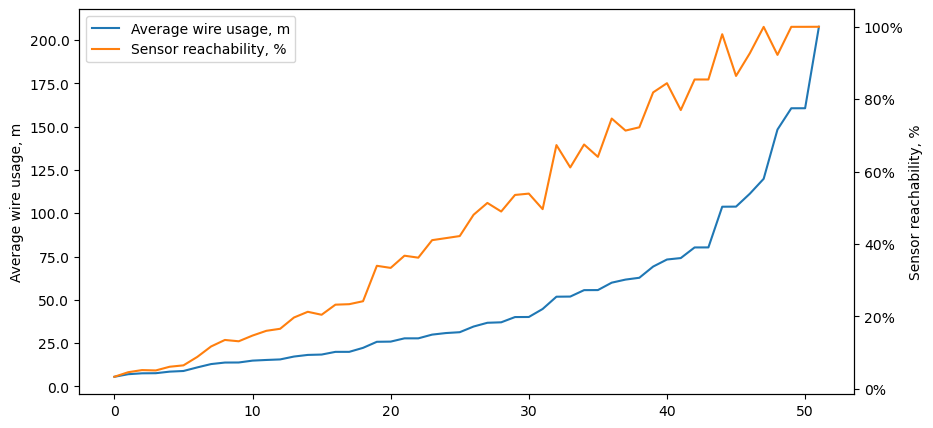

In [12]:
#g_rel_df = rel_df.groupby(['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius']).mean(numeric_only=True).reset_index()
# with different joint radiuses (10,20,40,80,160)
g_rel_df = rel_df.loc[rel_df['CFG_joint_radius'] == 10].groupby(['CFG_algorythm', 'CFG_node_distance']).mean(numeric_only=True).sort_values(by=['T_wire_L']).reset_index()


#g_rel_df[['CFG_algorythm', 'CFG_node_distance', 'T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']].head(n=100)

#plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L']], figsize=(10, 5))

plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors']], new_labels=["Average wire usage, m", "Sensor reachability, %"], formatters=[mtick.FuncFormatter(fmt_mm_to_m) , mtick.PercentFormatter(1.0)], figsize=(10, 5))

res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.8) & (g_rel_df['T_wire_L']<= 80000)].reset_index()
res_df[['CFG_algorythm', 'CFG_node_distance', 'T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

,CFG_algorythm,CFG_node_distance,T_wire_L,P_reachable_node_C__Median,P_reachable_node_C__error,P_reachable_wire_L__Median,P_reachable_wire_L__error,SP_P_reachable_sensors,SP_P_useful_wire_L,SP_path_L__Max,SP_path_node_C__Max,SP_path_router_node_branches__Max
0,6.6.6,40.0,34585.978613,1.000000,0.0,1.000000,0.0,0.815553,0.622746,1819.639611,50.794118,2.000000
1,4.6.12.a,40.0,36730.841975,0.999963,0.0,0.999991,0.0,0.842587,0.621282,1854.703075,52.170588,2.023529
2,3.3.4.3.4,80.0,40089.892946,1.000000,0.0,1.000000,0.0,0.850346,0.401530,1645.451196,27.076471,4.000000
3,3.3.3.4.4,80.0,40106.346179,1.000000,0.0,1.000000,0.0,0.851000,0.402001,1677.822960,27.676471,4.000000
4,3.3.3.3.3.3,80.0,51844.517312,1.000000,0.0,1.000000,0.0,0.975915,0.341785,1576.734297,26.747059,5.000000
5,3.6.3.6,40.0,51906.645967,1.000000,0.0,1.000000,0.0,0.861760,0.444940,1563.070185,44.788235,3.000000
6,3.4.6.4,40.0,55635.459614,1.000000,0.0,1.000000,0.0,0.925794,0.467757,1680.187677,49.088235,3.005882
7,4.6.12,20.0,55637.316505,1.000000,0.0,1.000000,0.0,0.872708,0.542581,1772.110776,94.935294,2.929412
8,4.4.4.4,40.0,59911.116968,1.000000,0.0,1.000000,0.0,0.999270,0.471139,1694.675531,52.358824,3.005882
9,4.8.8,20.0,61700.339549,1.000000,0.0,1.000000,0.0,0.973766,0.566030,1750.969388,95.147059,2.947059


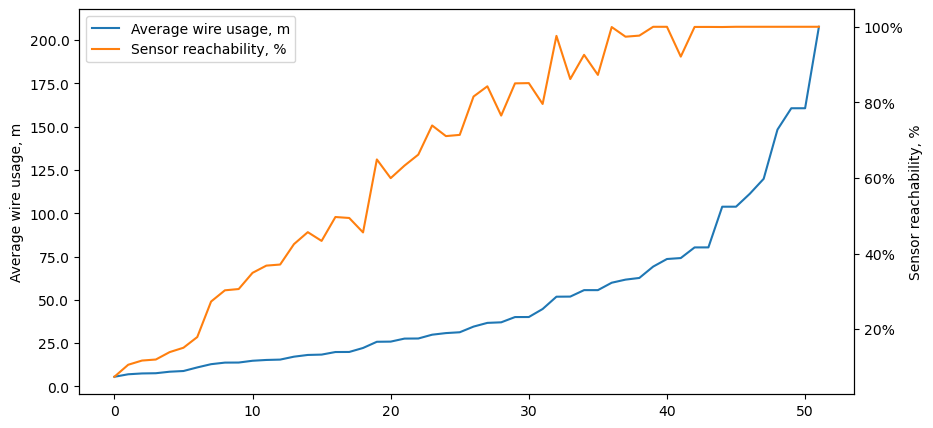

In [13]:
g_rel_df = rel_df.loc[rel_df['CFG_joint_radius'] == 20].groupby(['CFG_algorythm', 'CFG_node_distance']).mean(numeric_only=True).sort_values(by=['T_wire_L']).reset_index()
plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors']], new_labels=["Average wire usage, m", "Sensor reachability, %"], formatters=[mtick.FuncFormatter(fmt_mm_to_m) , mtick.PercentFormatter(1.0)], figsize=(10, 5))
res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.8) & (g_rel_df['T_wire_L']<= 80000)].reset_index()
res_df[['CFG_algorythm', 'CFG_node_distance', 'T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

,CFG_algorythm,CFG_node_distance,T_wire_L,P_reachable_node_C__Median,P_reachable_node_C__error,P_reachable_wire_L__Median,P_reachable_wire_L__error,SP_P_reachable_sensors,SP_P_useful_wire_L,SP_path_L__Max,SP_path_node_C__Max,SP_path_router_node_branches__Max
0,4.6.12.a,80.0,18259.956139,0.992157,0.000000,0.993442,0.000000,0.823207,0.664094,2038.086993,30.511765,2.005882
1,3.3.3.4.4,160.0,19936.465458,0.981370,0.001623,0.983272,0.000791,0.819103,0.426384,1855.233281,17.794118,4.000000
2,3.3.4.3.4,160.0,19937.739692,0.987346,0.000504,0.989089,0.000383,0.826250,0.428769,1845.817625,17.500000,4.000000
3,3.3.3.3.3.3,160.0,25813.667667,0.996492,0.000000,0.997526,0.000000,0.961483,0.375401,1719.814644,17.223529,5.000000
4,3.6.3.6,80.0,25868.407082,0.998484,0.000000,0.999060,0.000000,0.853215,0.510095,1688.837144,26.517647,3.000000
5,4.6.12,40.0,27751.502492,0.998621,0.005477,0.998712,0.005658,0.863868,0.631601,1844.830046,50.929412,2.664706
6,3.4.6.4,80.0,27763.239421,0.999788,0.000000,0.999928,0.000000,0.921751,0.514487,1771.013972,28.564706,3.000000
7,4.4.4.4,80.0,29895.517705,1.000000,0.000000,1.000000,0.000000,0.997370,0.518557,1765.684084,29.541176,3.000000
8,4.8.8,40.0,30820.648033,1.000000,0.000000,1.000000,0.000000,0.970929,0.642530,1811.014540,51.129412,2.723529
9,4.6.12.b,40.0,31329.854579,1.000000,0.000000,1.000000,0.000000,0.975531,0.642462,1828.970483,51.352941,2.829412


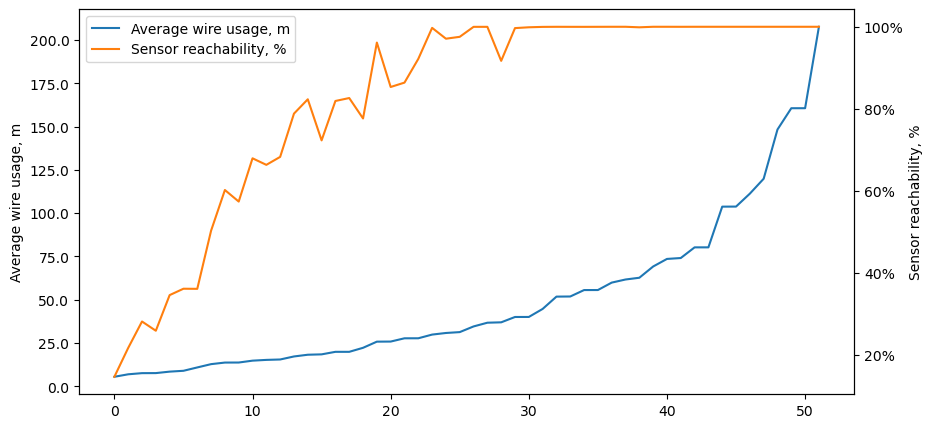

In [14]:
g_rel_df = rel_df.loc[rel_df['CFG_joint_radius'] == 40].groupby(['CFG_algorythm', 'CFG_node_distance']).mean(numeric_only=True).sort_values(by=['T_wire_L']).reset_index()
plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors']], new_labels=["Average wire usage, m", "Sensor reachability, %"], formatters=[mtick.FuncFormatter(fmt_mm_to_m) , mtick.PercentFormatter(1.0)], figsize=(10, 5))
res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.8) & (g_rel_df['T_wire_L']<= 80000)].reset_index()
res_df[['CFG_algorythm', 'CFG_node_distance', 'T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

,CFG_algorythm,CFG_node_distance,T_wire_L,P_reachable_node_C__Median,P_reachable_node_C__error,P_reachable_wire_L__Median,P_reachable_wire_L__error,SP_P_reachable_sensors,SP_P_useful_wire_L,SP_path_L__Max,SP_path_node_C__Max,SP_path_router_node_branches__Max
0,3.4.6.4,160.0,13712.203345,0.982317,0.000000,0.986830,0.000000,0.885862,0.552838,1998.957882,17.876471,3.000000
1,4.6.12,80.0,13833.565144,0.970197,0.000125,0.973813,0.000333,0.820954,0.669452,2009.188851,28.994118,2.382353
2,4.4.4.4,160.0,14885.480598,0.996753,0.000000,0.997470,0.000000,0.986289,0.568178,1984.081970,18.947059,3.000000
3,4.8.8,80.0,15301.521724,0.993078,0.000000,0.994038,0.000000,0.946874,0.696687,1966.423982,29.194118,2.364706
4,4.6.12.b,80.0,15599.687504,0.988629,0.000143,0.990998,0.000023,0.951065,0.693583,1991.250142,29.405882,2.464706
5,6.6.6,80.0,17232.331597,1.000000,0.000000,1.000000,0.000000,0.996900,0.708709,1877.076073,28.858824,2.605882
6,4.6.12.a,80.0,18228.812540,0.999635,0.000000,0.999918,0.000000,0.991195,0.706108,1926.762792,29.694118,2.694118
7,3.3.3.3.6,160.0,18371.484845,0.982603,0.005789,0.983024,0.006273,0.888346,0.452312,1836.709370,17.664706,4.000000
8,3.3.3.4.4,160.0,19900.152829,0.995975,0.000000,0.997147,0.000000,0.987874,0.465745,1807.194295,18.235294,4.000000
9,3.3.4.3.4,160.0,19939.298549,0.997481,0.000000,0.998374,0.000000,0.991512,0.469309,1774.103545,17.976471,4.000000


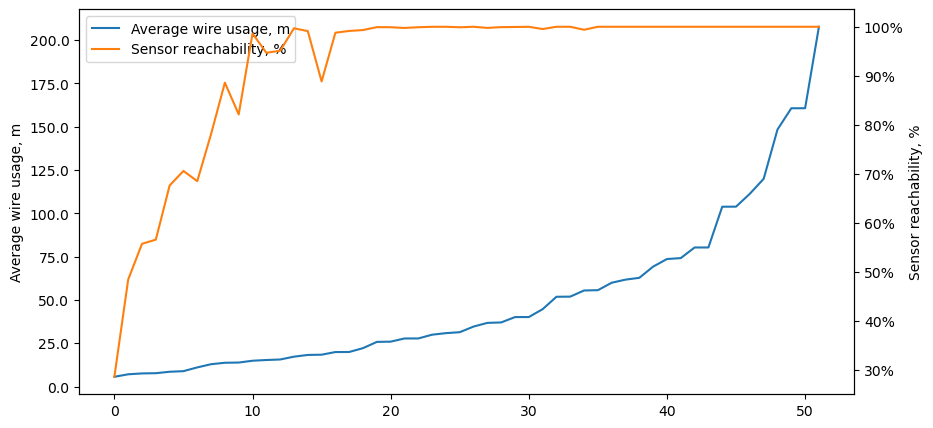

In [15]:
g_rel_df = rel_df.loc[rel_df['CFG_joint_radius'] == 80].groupby(['CFG_algorythm', 'CFG_node_distance']).mean(numeric_only=True).sort_values(by=['T_wire_L']).reset_index()
plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors']], new_labels=["Average wire usage, m", "Sensor reachability, %"], formatters=[mtick.FuncFormatter(fmt_mm_to_m) , mtick.PercentFormatter(1.0)], figsize=(10, 5))
res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.8) & (g_rel_df['T_wire_L']<= 80000)].reset_index()
res_df[['CFG_algorythm', 'CFG_node_distance', 'T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

,CFG_algorythm,CFG_node_distance,T_wire_L,P_reachable_node_C__Median,P_reachable_node_C__error,P_reachable_wire_L__Median,P_reachable_wire_L__error,SP_P_reachable_sensors,SP_P_useful_wire_L,SP_path_L__Max,SP_path_node_C__Max,SP_path_router_node_branches__Max
0,4.8.8,160.0,7631.634629,0.901059,0.008504,0.911708,0.007306,0.821028,0.682596,2203.122354,17.176471,2.094118
1,4.6.12.b,160.0,7654.880522,0.908568,0.010325,0.923158,0.010516,0.826661,0.680956,2211.990996,17.182353,2.200000
2,6.6.6,160.0,8549.292364,0.953354,0.005943,0.960904,0.006315,0.930281,0.740215,2158.219883,17.617647,2.200000
3,4.6.12.a,160.0,9025.911718,0.942189,0.006773,0.949839,0.007353,0.919035,0.725138,2183.269713,18.158824,2.241176
4,3.12.12,80.0,10985.079583,0.948826,0.001535,0.953675,0.002093,0.916666,0.698413,2046.114912,27.064706,2.658824
5,3.6.3.6,160.0,12858.942591,0.977433,0.005353,0.980964,0.006042,0.963702,0.588563,1931.216528,17.035294,3.082353
6,3.4.6.4,160.0,13750.798635,0.984505,0.003030,0.986911,0.003500,0.976527,0.596521,1920.532433,18.117647,3.217647
7,4.6.12,80.0,13786.143980,0.983338,0.002723,0.986183,0.001810,0.967632,0.729084,2012.467597,27.682353,3.229412
8,4.4.4.4,160.0,14870.517837,0.998657,0.000000,0.999201,0.000000,0.997296,0.604619,1858.755960,18.864706,3.070588
9,4.8.8,80.0,15326.930318,0.996203,0.000000,0.996818,0.000000,0.992594,0.752773,1905.154546,26.705882,3.252941


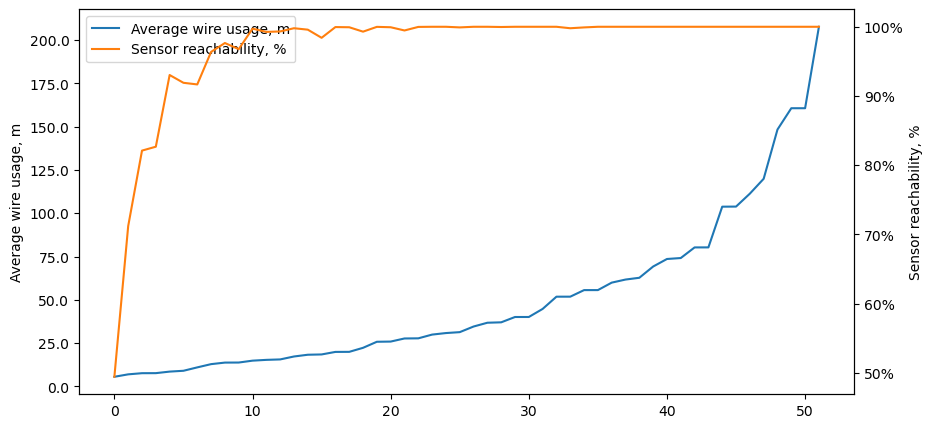

In [16]:
g_rel_df = rel_df.loc[rel_df['CFG_joint_radius'] == 160].groupby(['CFG_algorythm', 'CFG_node_distance']).mean(numeric_only=True).sort_values(by=['T_wire_L']).reset_index()
plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors']], new_labels=["Average wire usage, m", "Sensor reachability, %"], formatters=[mtick.FuncFormatter(fmt_mm_to_m) , mtick.PercentFormatter(1.0)], figsize=(10, 5))
res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.8) & (g_rel_df['T_wire_L']<= 80000)].reset_index()
res_df[['CFG_algorythm', 'CFG_node_distance', 'T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

<Axes: ylabel='Average wire usage, m'>

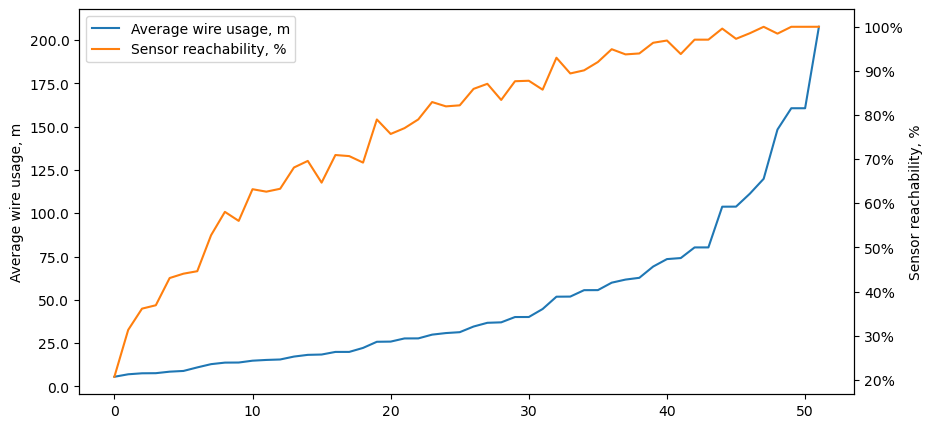

In [17]:
g_rel_df = rel_df.groupby(['CFG_algorythm', 'CFG_node_distance']).mean(numeric_only=True).sort_values(by=['T_wire_L']).reset_index()
plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors']], new_labels=["Average wire usage, m", "Sensor reachability, %"], formatters=[mtick.FuncFormatter(fmt_mm_to_m) , mtick.PercentFormatter(1.0)], figsize=(10, 5))


In [18]:
g_rel_df = rel_df.groupby(['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
#plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors']], new_labels=["Average wire usage, m", "Sensor reachability, %"], formatters=[mtick.FuncFormatter(fmt_mm_to_m) , mtick.PercentFormatter(1.0)], figsize=(10, 5))
res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.95) & (g_rel_df['CFG_joint_radius']== 160)].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
#res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.95) & (g_rel_df['CFG_joint_radius']== 160)& (g_rel_df['CFG_node_distance']== 160)& (g_rel_df['CFG_algorythm']== '3.6.3.6')].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
#res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.1) & (g_rel_df['CFG_algorythm']== '3.6.3.6')].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
res_df[['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius', 'SP_reachability_length_ratio','T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

,CFG_algorythm,CFG_node_distance,CFG_joint_radius,SP_reachability_length_ratio,T_wire_L,P_reachable_node_C__Median,P_reachable_node_C__error,P_reachable_wire_L__Median,P_reachable_wire_L__error,SP_P_reachable_sensors,SP_P_useful_wire_L,SP_path_L__Max,SP_path_node_C__Max,SP_path_router_node_branches__Max
0,3.3.3.3.3.3,20.0,160.0,6.572307,207683.003844,1.000000,0.000000,1.000000,0.000000,1.000000,0.282409,1464.388052,73.329412,29.011765
1,3.3.4.3.4,20.0,160.0,8.495522,160649.749277,1.000000,0.000000,1.000000,0.000000,1.000000,0.326075,1492.434232,72.764706,23.670588
2,3.3.3.4.4,20.0,160.0,8.496003,160645.741105,1.000000,0.000000,1.000000,0.000000,1.000000,0.348694,1504.153656,74.305882,23.864706
3,3.3.3.3.6,20.0,160.0,9.199919,148343.717050,1.000000,0.000000,1.000000,0.000000,1.000000,0.325050,1522.582012,73.641176,21.411765
4,4.4.4.4,20.0,160.0,11.382736,119901.147587,1.000000,0.000000,1.000000,0.000000,1.000000,0.458280,1573.828727,75.670588,18.517647
5,3.4.6.4,20.0,160.0,12.265584,111314.552580,1.000000,0.000000,1.000000,0.000000,1.000000,0.451903,1572.265342,74.917647,16.594118
6,3.6.3.6,20.0,160.0,13.143454,103846.098523,1.000000,0.000000,1.000000,0.000000,1.000000,0.395434,1478.039302,72.823529,15.082353
7,3.3.3.3.3.3,40.0,160.0,13.152272,103792.912976,1.000000,0.000000,1.000000,0.000000,1.000000,0.339463,1482.571854,40.270588,15.611765
8,3.3.4.3.4,40.0,160.0,17.001489,80280.773430,1.000000,0.000000,1.000000,0.000000,1.000000,0.403105,1517.689684,40.211765,12.223529
9,3.3.3.4.4,40.0,160.0,17.018204,80266.143557,1.000000,0.000000,1.000000,0.000000,1.000000,0.413948,1536.336777,41.029412,12.370588


CFG_joint_radius
0.147190
0.349203
0.514266
0.679329
0.756069
0.832809
0.909549
0.986289
0.987665
0.989041
0.990417
0.991793
0.993169
0.994545
0.995920
0.997296


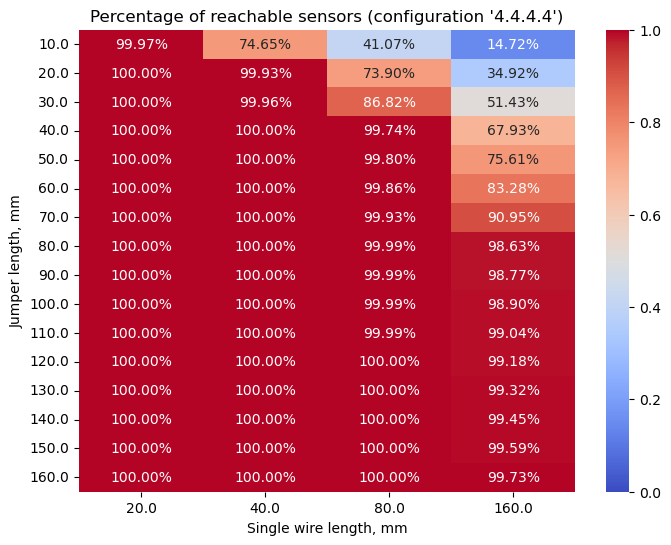

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



g_rel_df = rel_df.groupby(['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()

#res_df = g_rel_df.loc[((g_rel_df['CFG_algorythm'] == "4.4.4.4") & (g_rel_df['SP_P_reachable_sensors']>=0.95))].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()

res_df = g_rel_df.loc[((g_rel_df['CFG_algorythm'] == "4.4.4.4"))].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()


#rx = res_df[['CFG_node_distance', 'CFG_joint_radius', 'SP_reachability_length_ratio']].reset_index()
#glue = rx.pivot(index="CFG_joint_radius", columns="CFG_node_distance", values="SP_reachability_length_ratio")
rx = res_df[['CFG_node_distance', 'CFG_joint_radius', 'SP_P_reachable_sensors']].reset_index()
glue = rx.pivot(index="CFG_joint_radius", columns="CFG_node_distance", values="SP_P_reachable_sensors")


glue.loc[30.0] = np.nan
glue.loc[50.0] = np.nan
glue.loc[60.0] = np.nan
glue.loc[70.0] = np.nan
glue.loc[90.0] = np.nan
glue.loc[100.0] = np.nan
glue.loc[110.0] = np.nan
glue.loc[120.0] = np.nan
glue.loc[130.0] = np.nan
glue.loc[140.0] = np.nan
glue.loc[150.0] = np.nan

glue = glue.sort_index().interpolate(method='slinear')
print(glue[160.0].to_string(index=False))


plt.figure(figsize=(8, 6))
#sns.heatmap(glue, annot=True, cmap='coolwarm', fmt=".1f", vmin=0, vmax=100)
sns.heatmap(glue, annot=True, cmap='coolwarm', fmt=".2%", vmin=0, vmax=1)

# Show the plot
plt.xlabel("Single wire length, mm")
plt.ylabel("Jumper length, mm")
#plt.title("Reachability per 1000 m of wire (configuration '4.4.4.4')")
plt.title("Percentage of reachable sensors (configuration '4.4.4.4')")
plt.show()


#a = np.array(rx.values.tolist()).astype('float')
#rx
#plt.imshow(a, cmap='hot', interpolation='nearest')
#plt.show()

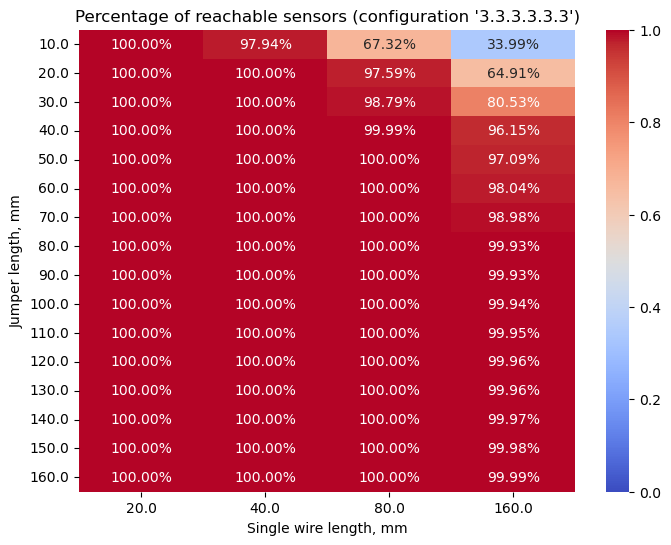

In [50]:
g_rel_df = rel_df.groupby(['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()

#res_df = g_rel_df.loc[((g_rel_df['CFG_algorythm'] == "3.3.3.3.3.3")& (g_rel_df['SP_P_reachable_sensors']>=0.95))].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
res_df = g_rel_df.loc[((g_rel_df['CFG_algorythm'] == "3.3.3.3.3.3"))].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()

#rx = res_df[['CFG_node_distance', 'CFG_joint_radius', 'SP_reachability_length_ratio']].reset_index()
#glue = rx.pivot(index="CFG_joint_radius", columns="CFG_node_distance", values="SP_reachability_length_ratio")
rx = res_df[['CFG_node_distance', 'CFG_joint_radius', 'SP_P_reachable_sensors']].reset_index()
glue = rx.pivot(index="CFG_joint_radius", columns="CFG_node_distance", values="SP_P_reachable_sensors")

glue.loc[30.0] = np.nan
glue.loc[50.0] = np.nan
glue.loc[60.0] = np.nan
glue.loc[70.0] = np.nan
glue.loc[90.0] = np.nan
glue.loc[100.0] = np.nan
glue.loc[110.0] = np.nan
glue.loc[120.0] = np.nan
glue.loc[130.0] = np.nan
glue.loc[140.0] = np.nan
glue.loc[150.0] = np.nan

glue = glue.sort_index().interpolate(method='slinear')

plt.figure(figsize=(8, 6))
#sns.heatmap(glue, annot=True, cmap='coolwarm', fmt=".1f", vmin=0, vmax=100)
sns.heatmap(glue, annot=True, cmap='coolwarm', fmt=".2%", vmin=0, vmax=1)

# Show the plot
plt.xlabel("Single wire length, mm")
plt.ylabel("Jumper length, mm")
#plt.title("Reachability per 1000 m of wire (configuration '3.3.3.3.3.3')")
plt.title("Percentage of reachable sensors (configuration '3.3.3.3.3.3')")
plt.show()


CFG_joint_radius
0.117108
0.273349
0.399451
0.502893
0.591158
0.664246
0.726190
0.781023
0.828745
0.869357
0.902858
0.929248
0.948528
0.960697
0.965755
0.963702


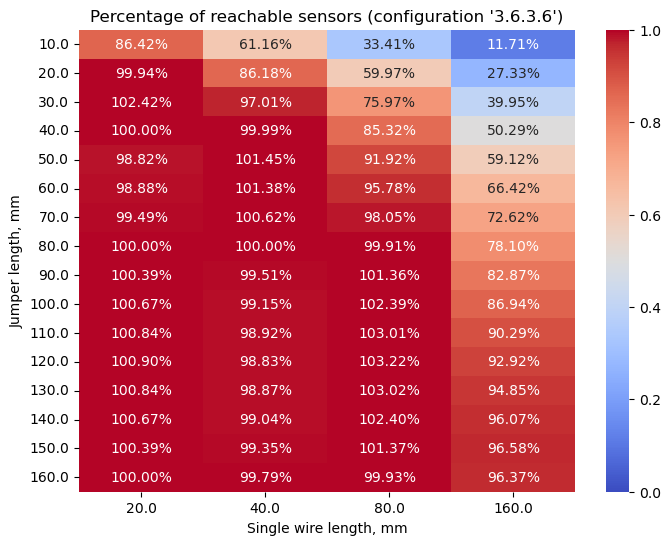

In [52]:
g_rel_df = rel_df.groupby(['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()

#res_df = g_rel_df.loc[((g_rel_df['CFG_algorythm'] == "3.6.3.6")& (g_rel_df['SP_P_reachable_sensors']>=0.95))].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
res_df = g_rel_df.loc[((g_rel_df['CFG_algorythm'] == "3.6.3.6"))].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()

#rx = res_df[['CFG_node_distance', 'CFG_joint_radius', 'SP_reachability_length_ratio']].reset_index()
#glue = rx.pivot(index="CFG_joint_radius", columns="CFG_node_distance", values="SP_reachability_length_ratio")
rx = res_df[['CFG_node_distance', 'CFG_joint_radius', 'SP_P_reachable_sensors']].reset_index()
glue = rx.pivot(index="CFG_joint_radius", columns="CFG_node_distance", values="SP_P_reachable_sensors")

glue.loc[30.0] = np.nan
glue.loc[50.0] = np.nan
glue.loc[60.0] = np.nan
glue.loc[70.0] = np.nan
glue.loc[90.0] = np.nan
glue.loc[100.0] = np.nan
glue.loc[110.0] = np.nan
glue.loc[120.0] = np.nan
glue.loc[130.0] = np.nan
glue.loc[140.0] = np.nan
glue.loc[150.0] = np.nan

glue = glue.sort_index().interpolate(method='quadratic')

print(glue[160.0].to_string(index=False))

plt.figure(figsize=(8, 6))
#sns.heatmap(glue, annot=True, cmap='coolwarm', fmt=".1f", vmin=0, vmax=100)
sns.heatmap(glue, annot=True, cmap='coolwarm', fmt=".2%", vmin=0, vmax=1)

# Show the plot
plt.xlabel("Single wire length, mm")
plt.ylabel("Jumper length, mm")
#plt.title("Reachability per 1000 m of wire (configuration '3.6.3.6')")
plt.title("Percentage of reachable sensors (configuration '3.6.3.6')")
plt.show()


In [114]:
best_rel_df = rel_df.loc[(rel_df['CFG_joint_radius']== 160) & (rel_df['CFG_node_distance']== 160)& (rel_df['CFG_algorythm']== '3.6.3.6')].reset_index()
#best_rel_df[['SP_P_reachable_sensors']].describe()
best_rel_df[['SP_reachability_length_ratio']].describe()



#.groupby(['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
#plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors']], new_labels=["Average wire usage, m", "Sensor reachability, %"], formatters=[mtick.FuncFormatter(fmt_mm_to_m) , mtick.PercentFormatter(1.0)], figsize=(10, 5))
#res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.95) & (g_rel_df['CFG_joint_radius']== 160)].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
#res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.95) & (g_rel_df['CFG_joint_radius']== 160)& (g_rel_df['CFG_node_distance']== 160)& (g_rel_df['CFG_algorythm']== '3.6.3.6')].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
#res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.1) & (g_rel_df['CFG_algorythm']== '3.6.3.6')].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
#res_df[['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius', 'SP_reachability_length_ratio','T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

,SP_reachability_length_ratio
count,170.000000
mean,100.318931
std,55.839235
min,24.719286
25%,56.617527
50%,86.586747
75%,129.570650
max,292.988016


<Axes: ylabel='Node distance, mm'>

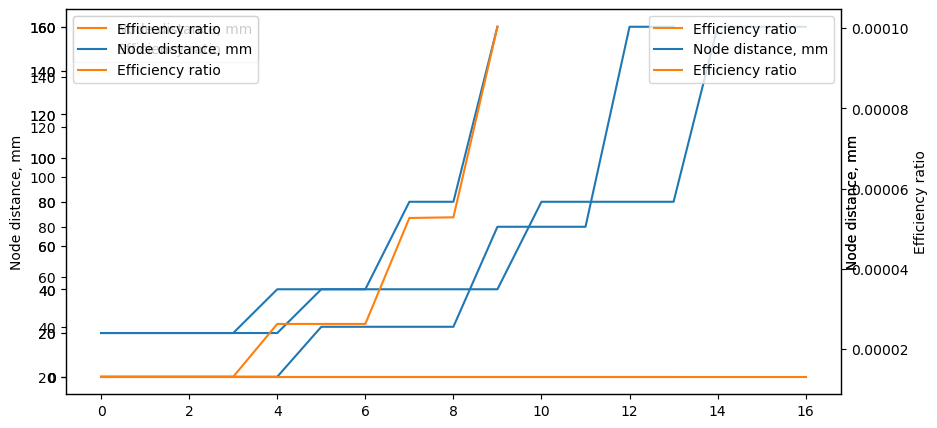

In [18]:
g_rel_df = rel_df.groupby(['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
#plot_multi(g_rel_df[['T_wire_L', 'SP_P_reachable_sensors']], new_labels=["Average wire usage, m", "Sensor reachability, %"], formatters=[mtick.FuncFormatter(fmt_mm_to_m) , mtick.PercentFormatter(1.0)], figsize=(10, 5))
res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.95) & ((g_rel_df['CFG_algorythm'] == "4.4.4.4"))].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
res_df[['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius', 'SP_reachability_length_ratio','T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

plot_multi(res_df[['CFG_node_distance', 'SP_reachability_length_ratio']], new_labels=["Node distance, mm", "Efficiency ratio"], figsize=(10, 5))

res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.95) & ((g_rel_df['CFG_algorythm'] == "3.3.3.3.3.3"))].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
res_df[['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius', 'SP_reachability_length_ratio','T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

plot_multi(res_df[['CFG_node_distance', 'SP_reachability_length_ratio']], new_labels=["Node distance, mm", "Efficiency ratio"], figsize=(10, 5))


res_df = g_rel_df.loc[(g_rel_df['SP_P_reachable_sensors']>=0.95) & ((g_rel_df['CFG_algorythm'] == "3.6.3.6"))].reset_index() #.groupby(['CFG_algorythm']).mean(numeric_only=True).sort_values(by=['SP_reachability_length_ratio']).reset_index()
res_df[['CFG_algorythm', 'CFG_node_distance', 'CFG_joint_radius', 'SP_reachability_length_ratio','T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_node_C__error', 'P_reachable_wire_L__Median', 'P_reachable_wire_L__error', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]

plot_multi(res_df[['CFG_node_distance', 'SP_reachability_length_ratio']], new_labels=["Node distance, mm", "Efficiency ratio"], figsize=(10, 5))


#|(g_rel_df['CFG_algorythm'] == "3.3.3.3.3.3	")|(g_rel_df['CFG_algorythm'] == "3.6.3.6")


In [36]:
filtered_df = rel_df[rel_df['CFG_algorythm'] == "4.4.4.4"]

filtered_df.describe()

#filtered_df_g = filtered_df.groupby(['CFG_node_distance']).mean(numeric_only=True).reset_index()

#filtered_df_g[['CFG_node_distance', 'T_wire_L', 'SP_P_unreachable_bc_short_jumper', 'P_reachable_node_C__Median', 'P_reachable_wire_L__Median', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']]
#sns.pairplot(filtered_df_g[['CFG_node_distance', 'T_wire_L', 'P_reachable_node_C__Median', 'P_reachable_wire_L__Median', 'SP_P_reachable_sensors', 'SP_P_useful_wire_L', 'SP_path_L__Max', 'SP_path_node_C__Max', 'SP_path_router_node_branches__Max']], hue = "CFG_node_distance")

,CFG_clothe_ID,CFG_node_distance,CFG_joint_radius,T_wire_L,T_jumper_L,T_jumper_C,T_node_C,reachable_node_C__Median,reachable_node_C__lci,reachable_node_C__hci,...,LJP_P_path_sensor_jumper_L__Median,LJP_P_path_sensor_jumper_L__error,LJP_path_router_node_branches__Max_error,LJP_path_router_node_branches__error,LJP_graph_wire_L__Max_error,LJP_graph_wire_L__error,LJP_graph_node_C__Max_error,LJP_graph_node_C__error,LJP_graph_jumper_C__Max_error,LJP_graph_jumper_C__error
count,3400.0000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,...,3400.000000,3.400000e+03,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,8.0000,75.000000,62.000000,56152.554655,21255.398639,437.354412,1247.543824,1244.346324,1244.166324,1244.397941,...,inf,inf,0.003243,0.250324,109.115374,56.405820,2.538801,1.222318,0.288294,0.098092
std,4.8997,53.626913,54.560751,55719.065006,59391.144213,876.874601,1677.387970,1679.518872,1679.647154,1679.481970,...,NaN,NaN,0.056797,0.429487,57.945399,29.249561,1.967811,0.907844,0.445798,0.097112
min,0.0000,20.000000,10.000000,3671.694503,0.000000,0.000000,33.000000,16.000000,11.000000,16.000000,...,0.000004,5.801329e-08,0.000000,0.000000,14.566792,7.007663,0.000000,0.100000,0.000000,0.000000
25%,4.0000,35.000000,20.000000,17709.767625,318.845125,23.000000,166.000000,155.000000,155.000000,155.000000,...,0.000480,7.089797e-06,0.000000,0.000000,67.512421,35.188835,1.000000,0.582490,0.000000,0.026540
50%,8.0000,60.000000,40.000000,36258.423814,1857.566821,98.000000,497.000000,497.000000,497.000000,497.000000,...,0.004261,6.443744e-05,0.000000,0.000000,97.429012,49.794485,2.000000,0.967978,0.000000,0.055655
75%,12.0000,100.000000,80.000000,74145.292133,12007.689610,410.000000,1651.250000,1651.250000,1651.250000,1651.250000,...,0.030686,4.927509e-04,0.000000,0.500000,137.613226,70.746071,3.500000,1.593159,1.000000,0.149245
max,16.0000,160.000000,160.000000,371348.658571,767901.411482,10056.000000,10657.000000,10657.000000,10657.000000,10657.000000,...,inf,inf,1.000000,1.000000,601.722407,265.557022,14.500000,7.556400,1.000000,0.652784


In [37]:
#f_g_rel_df = g_rel_df[(g_rel_df['SP_P_useful_wire_L']>=0.70) & (g_rel_df['SP_P_reachable_sensors']>=0.99)]
f_g_rel_df = g_rel_df[(g_rel_df['SP_P_useful_wire_L']>=0.60) & (g_rel_df['SP_P_reachable_sensors']>=0.90) & (g_rel_df['CFG_joint_radius']<=40)]
#f_g_rel_df = g_rel_df[(g_rel_df['SP_P_useful_wire_L']>=0.70) & (g_rel_df['SP_P_reachable_sensors']>=0.99) & (g_rel_df['CFG_joint_radius']<=80)]


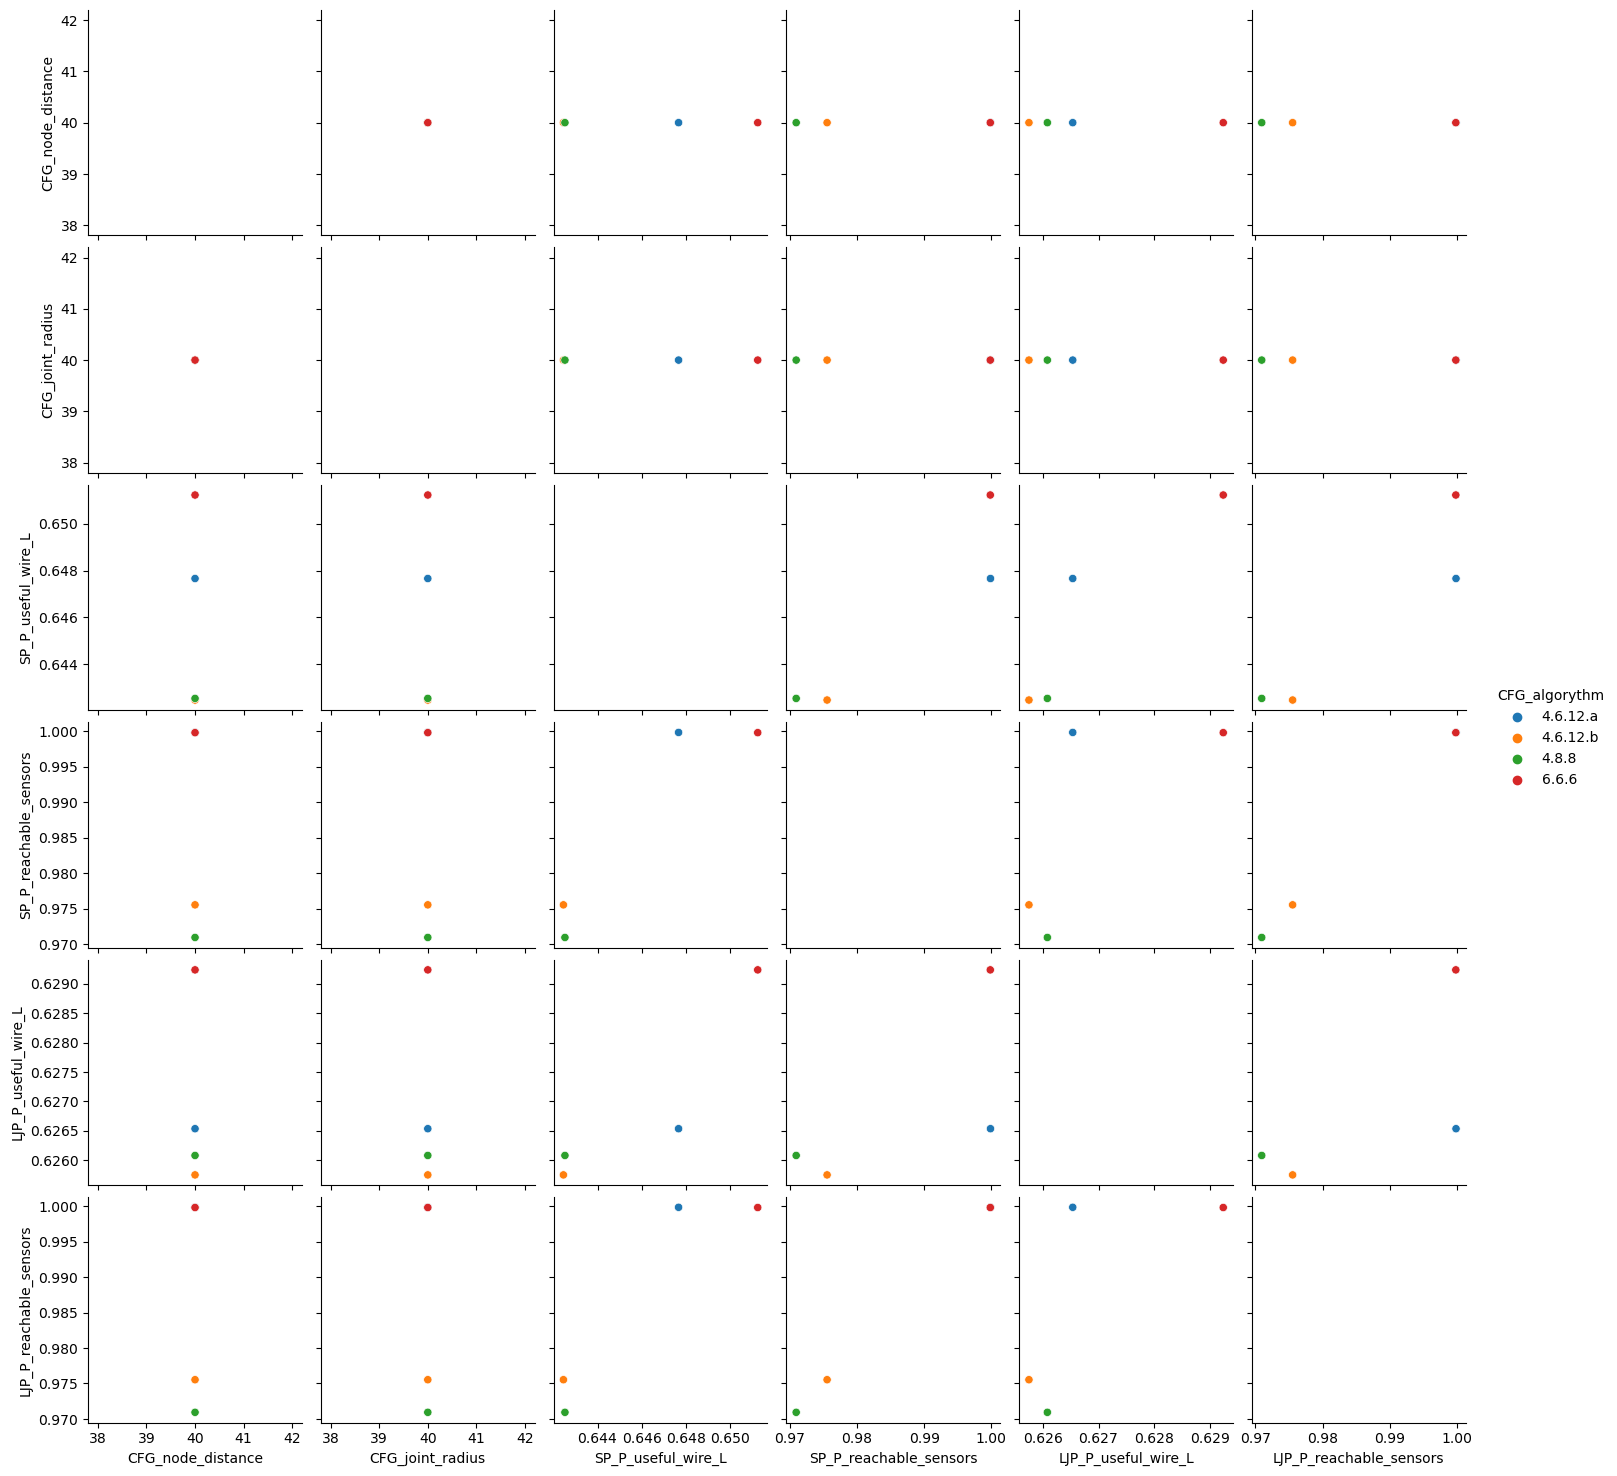

In [13]:
#sns.pairplot(f_g_rel_df[['CFG_algorythm','CFG_node_distance', 'CFG_joint_radius', 'CFG_joint_length_ratio', 'SP_P_useful_wire_L', 'SP_P_reachable_sensors']], hue = "CFG_algorythm")
sns.pairplot(f_g_rel_df[['CFG_algorythm','CFG_node_distance', 'CFG_joint_radius', 'SP_P_useful_wire_L', 'SP_P_reachable_sensors', 'LJP_P_useful_wire_L', 'LJP_P_reachable_sensors']], hue = "CFG_algorythm")

#TODO PLOT ALSO OTHER path algorythm...! SHortest jumper coumnt

#df.boxplot(column='SP_P_reachable_sensors', by=['CFG_algorythm','CFG_node_distance'], rot=90)

: 

: 